In [10]:
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/My Drive/Supermart Grocery Sales - Retail Analytics Dataset.csv'
df= pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11/8/2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11/8/2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,6/12/2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10/11/2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10/11/2016,South,2355,0.26,918.45,Tamil Nadu


In [12]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Fill or drop missing values if any
df = df.dropna()  # or use df.fillna() to fill missing values

# Convert columns to appropriate data types if necessary
# Example: Convert ' Order Date' column to datetime
df['Date'] = pd.to_datetime(df['Order Date'])

# Display the data types of each column
print("Data types of each column:")
print(df.dtypes)

# Check for duplicate rows and remove them
df = df.drop_duplicates()

Missing values in each column:
Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64
Data types of each column:
Order ID                 object
Customer Name            object
Category                 object
Sub Category             object
City                     object
Order Date               object
Region                   object
Sales                     int64
Discount                float64
Profit                  float64
State                    object
Date             datetime64[ns]
dtype: object


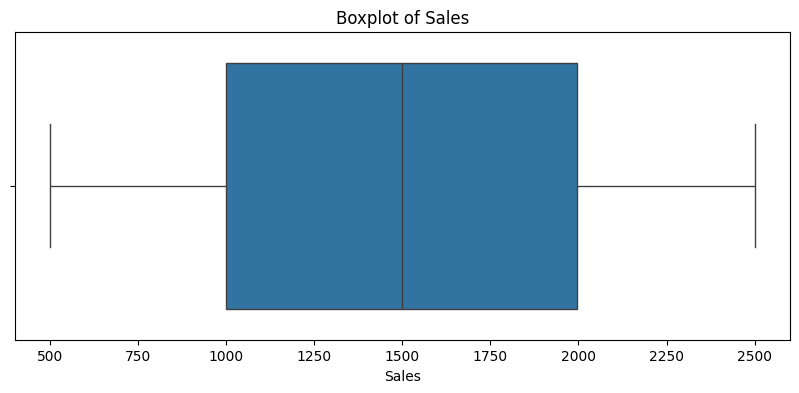

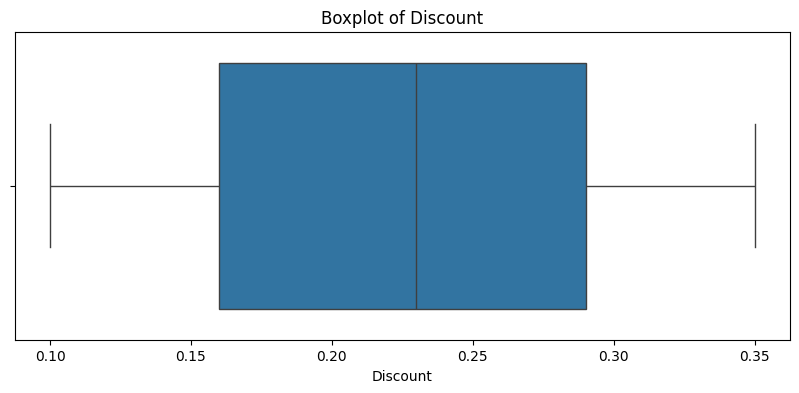

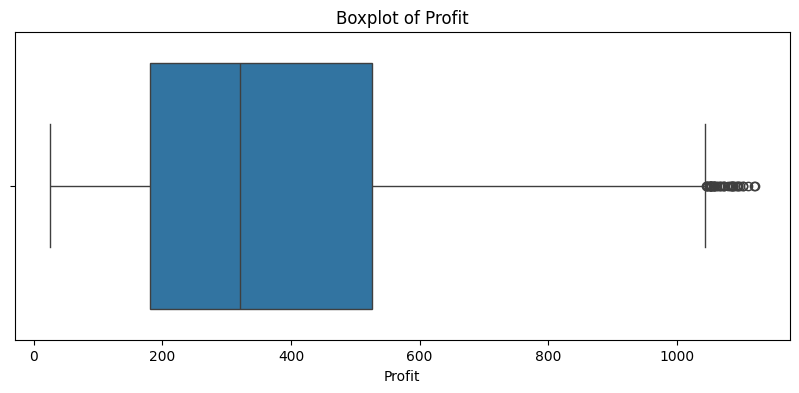

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Detect outliers using boxplot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Handle outliers: Remove or cap them
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [14]:
# City-wise total sales revenue
city_sales = df.groupby('City')['Sales'].sum()
print("City-wise total sales revenue:")
print(city_sales)

# Region-wise total sales revenue
region_sales = df.groupby('Region')['Sales'].sum()
print("Region-wise total sales revenue:")
print(region_sales)

City-wise total sales revenue:
City
Bodi              664705
Chennai           632612
Coimbatore        625043
Cumbum            621123
Dharmapuri        569230
Dindigul          573215
Kanyakumari       704384
Karur             637424
Krishnagiri       634795
Madurai           615397
Nagercoil         548975
Namakkal          596144
Ooty              596850
Perambalur        647841
Pudukottai        648323
Ramanadhapuram    627091
Salem             652216
Tenkasi           641327
Theni             574594
Tirunelveli       652544
Trichy            531779
Vellore           676550
Viluppuram        576353
Virudhunagar      604373
Name: Sales, dtype: int64
Region-wise total sales revenue:
Region
Central    3441206
East       4216826
North         1254
South      2426087
West       4767515
Name: Sales, dtype: int64


In [16]:
# Calculate Gross Profit Margin
df['Cost'] = df['Sales'] - df['Profit']
df['Gross Profit Margin'] = (df['Sales'] - df['Cost']) / df['Sales']

# Region-wise gross profit margin
region_gpm = df.groupby('Region')['Gross Profit Margin'].mean()
print("Region-wise gross profit margin:")
print(region_gpm)

Region-wise gross profit margin:
Region
Central    0.247578
East       0.251319
North      0.320000
South      0.252244
West       0.247539
Name: Gross Profit Margin, dtype: float64


In [17]:
# Calculate Net Profit Margin
df['Net Profit Margin'] = df['Profit'] / df['Sales']

# City-wise net profit margin
city_npm = df.groupby('City')['Net Profit Margin'].mean()
print("City-wise net profit margin:")
print(city_npm)

City-wise net profit margin:
City
Bodi              0.259229
Chennai           0.254872
Coimbatore        0.247170
Cumbum            0.245711
Dharmapuri        0.245307
Dindigul          0.249772
Kanyakumari       0.242293
Karur             0.259509
Krishnagiri       0.248542
Madurai           0.251818
Nagercoil         0.251694
Namakkal          0.242438
Ooty              0.252159
Perambalur        0.260559
Pudukottai        0.249766
Ramanadhapuram    0.249211
Salem             0.244499
Tenkasi           0.245244
Theni             0.243143
Tirunelveli       0.246727
Trichy            0.248499
Vellore           0.256069
Viluppuram        0.246987
Virudhunagar      0.242819
Name: Net Profit Margin, dtype: float64


In [18]:
# Calculate year-over-year sales growth rate
df['Year'] = df['Date'].dt.year
region_sales_yearly = df.groupby(['Region', 'Year'])['Sales'].sum().unstack()

# Calculate growth rate
region_sales_growth = region_sales_yearly.pct_change(axis=1)
print("Region-wise sales growth rate:")
print(region_sales_growth)

Region-wise sales growth rate:
Year     2015      2016      2017      2018
Region                                     
Central   NaN  0.031139  0.275956  0.302870
East      NaN  0.243144  0.165468  0.215537
North     NaN       NaN       NaN  0.000000
South     NaN -0.034851  0.227425  0.241753
West      NaN -0.042060  0.257828  0.381548


In [20]:
# City-wise purchase of sub-category
city_subcategory_purchase = df.groupby(['City', 'Sub Category'])['Sales'].sum()
print("City-wise purchase of sub category:")
print(city_subcategory_purchase)

City-wise purchase of sub category:
City          Sub Category      
Bodi          Atta & Flour          20211
              Biscuits              28298
              Breads & Buns         34837
              Cakes                 29406
              Chicken               29682
                                    ...  
Virudhunagar  Organic Staples       22666
              Organic Vegetables    20118
              Rice                  20359
              Soft Drinks           24536
              Spices                27616
Name: Sales, Length: 552, dtype: int64


In [21]:
# Year-wise profit
yearly_profit = df.groupby('Year')['Profit'].sum()
print("Year-wise profit:")
print(yearly_profit)

Year-wise profit:
Year
2015     748183.97
2016     789745.47
2017     933889.74
2018    1229192.70
Name: Profit, dtype: float64


In [22]:
# City-wise average discount
city_avg_discount = df.groupby('City')['Discount'].mean()
print("City-wise average discount:")
print(city_avg_discount)

City-wise average discount:
City
Bodi              0.221338
Chennai           0.226427
Coimbatore        0.222170
Cumbum            0.230289
Dharmapuri        0.228667
Dindigul          0.221013
Kanyakumari       0.223297
Karur             0.227079
Krishnagiri       0.227608
Madurai           0.223342
Nagercoil         0.229355
Namakkal          0.228085
Ooty              0.224739
Perambalur        0.234615
Pudukottai        0.223131
Ramanadhapuram    0.227010
Salem             0.224592
Tenkasi           0.231137
Theni             0.231247
Tirunelveli       0.229323
Trichy            0.234816
Vellore           0.230207
Viluppuram        0.228025
Virudhunagar      0.218627
Name: Discount, dtype: float64


In [23]:
# Region-wise sales average profit
region_avg_profit = df.groupby('Region')['Profit'].mean()
print("Region-wise sales average profit:")
print(region_avg_profit)

Region-wise sales average profit:
Region
Central    365.409347
East       374.045884
North      401.280000
South      382.635821
West       369.333082
Name: Profit, dtype: float64


In [24]:
# Category-wise average profit
category_avg_profit = df.groupby('Category')['Profit'].mean()
print("Category-wise average profit:")
print(category_avg_profit)

Category-wise average profit:
Category
Bakery               369.992819
Beverages            372.943649
Eggs, Meat & Fish    378.476303
Food Grains          377.049348
Fruits & Veggies     369.046925
Oil & Masala         363.759440
Snacks               371.616733
Name: Profit, dtype: float64


In [26]:
# Category, sub category-wise average sales
category_subcategory_avg_sales = df.groupby(['Category', 'Sub Category'])['Sales'].mean()
print("Category, sub category-wise average sales:")
print(category_subcategory_avg_sales)

Category, sub category-wise average sales:
Category           Sub Category      
Bakery             Biscuits              1484.142544
                   Breads & Buns         1473.593186
                   Cakes                 1512.626667
Beverages          Health Drinks         1461.011142
                   Soft Drinks           1512.936484
Eggs, Meat & Fish  Chicken               1490.306358
                   Eggs                  1515.105820
                   Fish                  1514.310627
                   Mutton                1551.269036
Food Grains        Atta & Flour          1509.709402
                   Dals & Pulses         1523.532164
                   Organic Staples       1502.497312
                   Rice                  1510.069697
Fruits & Veggies   Fresh Fruits          1488.629428
                   Fresh Vegetables      1482.762040
                   Organic Fruits        1437.747826
                   Organic Vegetables    1488.690962
Oil & Masala      

In [27]:
!pip install pandas mlxtend numpy

In [31]:
# Preprocessing the data to get the basket format
basket = (df.groupby(['Order Date', 'Category'])['Sales']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order Date'))

# Convert the quantities to 1s and 0s
def encode_units(x):
    return 1 if x >= 1 else 0

basket_sets = basket.applymap(encode_units)

# Display the preprocessed data
basket_sets.head()

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Order Date,,,,,,,
1/1/2018,1,1,1,1,1,1,1
1/10/2015,0,0,1,0,0,0,0
1/10/2016,0,0,1,0,0,0,0
1/10/2017,0,0,1,0,1,0,1
1/11/2015,0,0,0,0,1,0,0


In [32]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.600324,(Bakery)
1,0.590615,(Beverages)
2,0.617314,"(Eggs, Meat & Fish)"
3,0.590615,(Food Grains)
4,0.599515,(Fruits & Veggies)


In [33]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bakery),(Beverages),0.600324,0.590615,0.398058,0.663073,1.122682,0.043498,1.215055,0.273411
1,(Beverages),(Bakery),0.590615,0.600324,0.398058,0.673973,1.122682,0.043498,1.225898,0.266927
2,(Bakery),"(Eggs, Meat & Fish)",0.600324,0.617314,0.423139,0.704852,1.141804,0.052551,1.296589,0.310735
3,"(Eggs, Meat & Fish)",(Bakery),0.617314,0.600324,0.423139,0.685452,1.141804,0.052551,1.270638,0.324530
4,(Food Grains),(Bakery),0.590615,0.600324,0.403722,0.683562,1.138655,0.049162,1.263047,0.297449


In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Convert Order Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month and year from Order Date
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

# Encode categorical variables
label_encoders = {}
for column in ['Category', 'Sub Category', 'City', 'Region', 'State']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target
X = df[['Region', 'State', 'Order Month', 'Order Year', 'Sales', 'Discount', 'Profit']]
y_category = df['Category']
y_sub_category = df['Sub Category']

# Split the data into training and testing sets
X_train, X_test, y_train_category, y_test_category, y_train_sub_category, y_test_sub_category = train_test_split(
    X, y_category, y_sub_category, test_size=0.2, random_state=42
)

X_train.head(), y_train_category.head(), y_train_sub_category.head()

Missing values in each column:
 Order ID               0
Customer Name          0
Category               0
Sub Category           0
City                   0
Order Date             0
Region                 0
Sales                  0
Discount               0
Profit                 0
State                  0
Date                   0
Cost                   0
Gross Profit Margin    0
Net Profit Margin      0
Year                   0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(      Region  State  Order Month  Order Year  Sales  Discount  Profit
 715        4      0            7        2015   1596      0.34  351.12
 809        4      0           10        2015   1900      0.34  722.00
 5099       4      0           12        2016    739      0.19  169.97
 9518       4      0            4        2015   1244      0.27  522.48
 8572       1      0           12        2018   1264      0.20  176.96,
 715     3
 809     4
 5099    1
 9518    0
 8572    6
 Name: Category, dtype: int64,
 715      7
 809     11
 5099    13
 9518     1
 8572     5
 Name: Sub Category, dtype: int64)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model for Category
rf_category = RandomForestClassifier(random_state=42)
rf_category.fit(X_train, y_train_category)
y_pred_category = rf_category.predict(X_test)

# Evaluate the model for Category
accuracy_category = accuracy_score(y_test_category, y_pred_category)
report_category = classification_report(y_test_category, y_pred_category)

# Train the model for Sub Category
rf_sub_category = RandomForestClassifier(random_state=42)
rf_sub_category.fit(X_train, y_train_sub_category)
y_pred_sub_category = rf_sub_category.predict(X_test)

# Evaluate the model for Sub Category
accuracy_sub_category = accuracy_score(y_test_sub_category, y_pred_sub_category)
report_sub_category = classification_report(y_test_sub_category, y_pred_sub_category)

(accuracy_category, report_category), (accuracy_sub_category, report_sub_category)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((0.143646408839779,
  '              precision    recall  f1-score   support\n\n           0       0.14      0.17      0.16       265\n           1       0.14      0.12      0.13       288\n           2       0.14      0.15      0.14       302\n           3       0.17      0.17      0.17       287\n           4       0.12      0.11      0.11       271\n           5       0.16      0.13      0.14       277\n           6       0.15      0.15      0.15       301\n\n    accuracy                           0.14      1991\n   macro avg       0.14      0.14      0.14      1991\nweighted avg       0.14      0.14      0.14      1991\n'),
 (0.04269211451531894,
  '              precision    recall  f1-score   support\n\n           0       0.03      0.03      0.03        76\n           1       0.05      0.07      0.06        91\n           2       0.03      0.03      0.03        96\n           3       0.01      0.01      0.01        78\n           4       0.03      0.03      0.03        66\n     

In [40]:
# Add a version column to keep track of changes
df['version'] = 1

# Function to update a record
def update_record(df, identifier, new_data):
    """
    Update a record in the DataFrame by appending a new row with updated data.

    Parameters:
    df (pd.DataFrame): The original DataFrame.
    identifier (dict): A dictionary containing the identifying information for the record to update.
                       e.g., {'Order ID': 1001}
    new_data (dict): A dictionary containing the new data for the record.
                     e.g., {'Order Date': '2024-06-20', 'Sales': 200}

    Returns:
    pd.DataFrame: The updated DataFrame with the new record appended.
    """
    # Find the record to update
    mask = np.all([df[col] == val for col, val in identifier.items()], axis=0)
    record_to_update = df[mask]

    if record_to_update.empty:
        print("Warning: Record not found. Creating a new record instead.")  # Inform the user
        new_version = 1  # Start with version 1 for new records
    else:
        # Increment the version
        new_version = record_to_update['version'].max() + 1

    # Create the new record
    new_record = identifier.copy()  # Start with identifier for new records
    new_record.update(new_data)
    new_record['version'] = new_version

    # Append the new record to the DataFrame using pd.concat
    df = pd.concat([df, pd.DataFrame([new_record])], ignore_index=True)

    return df

# Example update - ensure the 'Order ID' exists in your DataFrame
identifier = {'Order ID': df['Order ID'].iloc[0]}  # Use an existing Order ID
new_data = {'Order Date': '2024-06-20', 'Sales': 200}

# Update the record and print the updated DataFrame
df = update_record(df, identifier, new_data)
print(df)

# Save the updated DataFrame
df.to_csv(file_path, index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     Order ID Customer Name  Category  Sub Category  City  \
0         OD1        Harish       5.0          14.0  21.0   
1         OD2         Sudha       1.0          13.0   8.0   
2         OD3       Hussain       3.0           0.0  13.0   
3         OD4       Jackson       4.0          12.0   4.0   
4         OD5       Ridhesh       3.0          18.0  12.0   
...       ...           ...       ...           ...   ...   
9948   OD9992          Ravi       3.0          20.0   0.0   
9949   OD9993          Peer       5.0          22.0  14.0   
9950   OD9994        Ganesh       3.0           0.0  19.0   
9951      OD1           NaN       NaN           NaN   NaN   
9952      OD1           NaN       NaN           NaN   NaN   

               Order Date  Region  Sales  Discount  Profit  State       Date  \
0     2017-11-08 00:00:00     2.0   1254      0.12  401.28    0.0 2017-11-08   
1     2017-11-08 00:00:00     3.0    749      0.18  149.80    0.0 2017-11-08   
2     2017-06-12 00:00:00  